In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# netCDF4 needs to be installed in your environment for this to work
import xarray as xr
import rioxarray as rxr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import seaborn as sns
import geopandas as gpd
import earthpy as et

# Plotting options
sns.set(font_scale=1.3)
sns.set_style("white")

In [2]:
path = "D:\precipitation.nc"
precp_xr = xr.open_dataset(path)
precp_data = precp_xr['tp']

In [3]:
monthly_mean_path = "D:\monthlymean.nc"
monthly_data = xr.open_dataset(monthly_mean_path)

In [4]:
longterm_averages = monthly_data['tp']

In [5]:
longterm_averages

<xarray.DataArray 'tp' (month: 12, latitude: 1801, longitude: 3600)>
[77803200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

# Calculating Temperature Anomalies 


## Monthly Anomalies
We subtract monthly temperature data by average temperature for that month in the past 30 years

In [6]:
anomalies = []
i = 0

In [7]:
for k in range(0,len(precp_data)):
    if i >= 12:
        i = 0
    x = np.subtract(precp_data[k], longterm_averages[i])    
    anomalies.append(x)
    #print(i,k,k%12)
    i = i + 1

In [8]:
len(anomalies)

871

In [9]:
anom = xr.DataArray(data = anomalies, coords = precp_data.coords, dims = precp_data.dims)

In [12]:
#anom = anom.__xarray_dataarray_variable__

In [13]:
anom

<xarray.DataArray (time: 871, latitude: 1801, longitude: 3600)>
array([[[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [ 9.28692534e-05,  9.28692534e-05,  9.28692534e-05, ...,
          9.28692534e-05,  9.28692534e-05,  9.28692534e-05],
        [ 9.28692534e-05,  9.28692534e-05,  9.28692534e-05, ...,
          9.28692534e-05,  9.28692534e-05,  9.28692534e-05],
        [ 1.05209154e-04,  1.05209154e-04,  1.05209154e-04, ...,
          1.05209154e-04,  1.05209154e-04,  1.05209154e-04]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
...
          1.07058382e-04,  1.07058382e-04,  1.07058382e-04],
        [ 1.04109946e-04,  1.04109946e-04,  1.04109946e-04, ...,
          1.06874111e-04,  1.04109946e-04,  1.04109946e-04],
        [ 1.30087137e-04,  1.30087137e-04,  1.30087137e-04, ...,
          1.30087137e-04,  1.30087137e-04,  1.30087137e-04]],

       [[            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        [            nan,             nan,             nan, ...,
                     nan,             nan,             nan],
        ...,
        [-1.20691984e-05, -1.19770557e-05, -1.19770557e-05, ...,
         -1.21613411e-05, -1.21613411e-05, -1.20691984e-05],
        [-1.22534693e-05, -1.22534693e-05, -1.22534693e-05, ...,
         -1.22534693e-05, -1.22534693e-05, -1.22534693e-05],
        [ 5.62294736e-06,  5.62294736e-06,  5.62294736e-06, ...,
          5.62294736e-06,  5.62294736e-06,  5.62294736e-06]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-07-01

In [14]:
anom.to_netcdf(path= "D:\monthlyanomaly.nc")

In [15]:
anm = []
for i in anom:
    anm.append(i.mean(skipna=True))

In [16]:
monthly_anomaly = anm

In [17]:
anm = np.array(anm)

In [18]:
len(monthly_anomaly)

871

In [19]:
anom.time.coords

Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-07-01

In [20]:
anm = xr.DataArray(data = monthly_anomaly, coords = anom.time.coords)

anm

<xarray.DataArray (time: 871)>
array([-3.62985920e-05, -1.97098707e-05,  8.77087077e-05, -3.49115799e-05,
       -3.26084751e-06,  6.74762532e-06,  3.51498638e-05, -5.52934434e-05,
       -1.33072943e-04, -4.67264363e-05,  4.14883834e-05, -8.75952755e-05,
       -6.82191676e-05, -9.42840270e-05, -2.32492803e-05, -1.46182341e-04,
       -4.87743782e-05, -7.28923042e-05, -1.26320898e-04, -1.82188800e-04,
       -1.22457059e-04, -5.64724141e-05, -2.23594338e-06, -6.35383549e-05,
       -5.30209509e-05, -3.75167874e-05, -3.19651444e-05, -6.66412743e-05,
       -1.49189173e-05, -9.92177302e-05, -3.62059145e-05, -4.97918336e-05,
       -1.03413058e-05, -6.89903682e-05, -5.46154115e-05, -1.10773559e-04,
       -1.58461426e-05,  6.52660601e-05,  4.31257431e-05, -2.65213876e-05,
        3.45060507e-05, -5.58990541e-05, -6.20143110e-05, -8.42965892e-05,
       -1.64163775e-05, -5.27678276e-05,  7.94952314e-07,  6.32053852e-05,
       -8.34652383e-05, -2.24080050e-05, -1.10884474e-04, -3.39572944e-05,
       -5.33563507e-05,  6.51117298e-05,  4.73356085e-05,  1.60433156e-05,
       -6.93498878e-05, -4.94907981e-05, -4.79052287e-05, -9.52866976e-05,
        4.92214485e-06,  2.35818352e-05,  2.41565476e-06, -1.06788189e-04,
        2.91226261e-05,  5.52378515e-05,  1.08329923e-05, -3.87846849e-05,
        9.45492866e-06,  3.34460019e-05, -4.04207640e-05,  2.87128678e-05,
       -3.85036365e-05,  2.43299110e-05, -1.26954128e-05,  2.23977277e-05,
        7.17558723e-05,  4.45245823e-05,  4.54803994e-05,  6.98372678e-05,
...
        1.40648672e-05, -8.37318439e-05,  2.00982286e-05,  8.08768964e-05,
        1.20912613e-04,  5.15282773e-05,  1.05481071e-04,  5.15327447e-05,
        7.34390997e-05,  4.32229572e-05, -3.07624287e-05,  6.37538542e-05,
        1.29359323e-04,  1.44288031e-04,  9.88659667e-05,  8.93850447e-05,
        6.40272119e-05,  5.74248588e-05, -3.41333216e-05,  7.03908227e-05,
        4.67700665e-05,  8.06910757e-05,  5.49164070e-05, -4.32708403e-05,
       -1.11577092e-05,  7.45984362e-05,  5.35194122e-05,  1.72995860e-05,
        3.57424615e-05, -4.35849188e-06, -4.80034396e-06,  2.42509741e-05,
        1.96087367e-05,  6.87689899e-05,  6.57642886e-05, -1.90567414e-06,
       -4.14008646e-05, -4.82195765e-06, -7.94043808e-05,  1.38679579e-05,
        5.16849759e-05,  3.98726479e-05, -2.27696892e-05,  2.56999447e-05,
        1.03102529e-05,  1.71737614e-04,  2.16475496e-06,  1.40956208e-05,
        6.33844393e-05,  8.23649170e-05,  9.40216560e-05,  1.71147303e-06,
        3.00253873e-06,  8.46744733e-05,  7.93917425e-05,  5.05826247e-05,
       -2.12431814e-06, -1.84981564e-05,  2.35155385e-05,  5.58147003e-05,
        3.03982924e-05, -3.05141621e-05,  4.46787490e-05, -9.90814078e-05,
        2.73538135e-05, -4.45544247e-05, -5.27893917e-06,  2.93371904e-05,
        5.06680699e-05,  1.20905934e-05,  6.92496615e-05,  6.29418428e-05,
        4.96504654e-05, -1.49175512e-05,  1.32910181e-05, -3.10961550e-05,
        2.29141860e-05,  1.07952183e-05,  1.00970992e-05], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2022-07-01

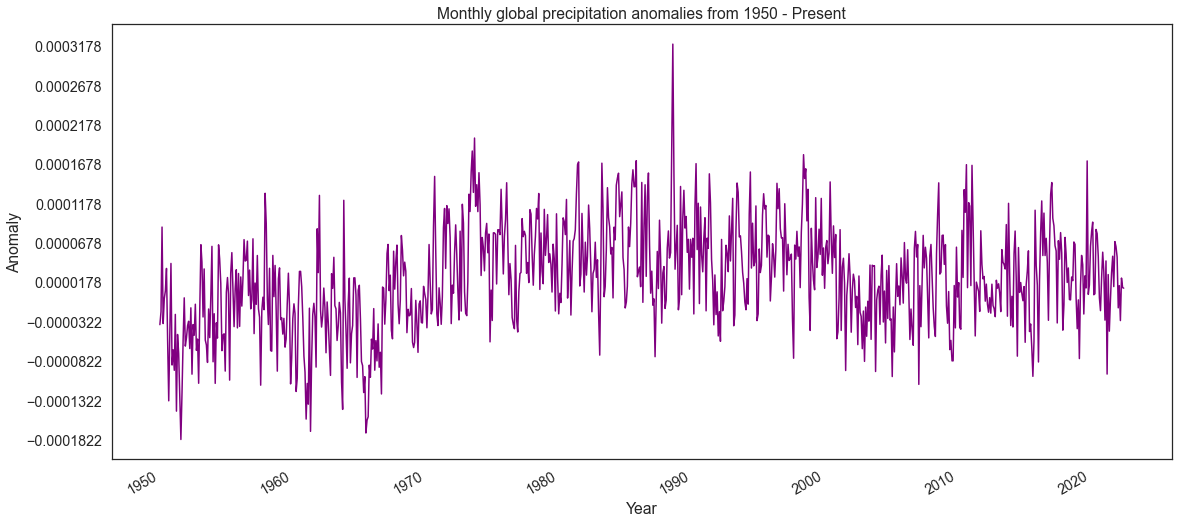

In [30]:
f, ax = plt.subplots(figsize=(19, 8))
plt.yticks(np.arange(min(anm), max(anm)+0.0001, 0.00005))
           
anm.plot(hue='lat',ax=ax,color="purple",label ='Mean temperature')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Monthly global precipitation anomalies from 1950 - Present')
plt.savefig('MonthlyGlobalPrecpAnomalies.png')

In [22]:
monthly_anomalies = anm.to_pandas()

In [23]:
monthly_anomalies.to_csv("monthlyanomalies.csv")

## Yearly Anomalies

We subtract yearly average from yearly data to get yearly anomalies

In [24]:
yearly_averages = xr.open_dataset("D:/yearlymean.nc")

In [25]:
yearly_averages = yearly_averages['tp'][0:30]

In [27]:
yearly_averages

<xarray.DataArray 'tp' (year: 30, latitude: 1801, longitude: 3600)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.000181, 0.000181, ..., 0.000181, 0.000181],
        [0.000193, 0.000193, ..., 0.000193, 0.000193]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.000152, 0.000152, ..., 0.000152, 0.000152],
        [0.000168, 0.000168, ..., 0.000168, 0.000168]],

       ...,

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.000141, 0.000141, ..., 0.000141, 0.000141],
        [0.000152, 0.000152, ..., 0.000152, 0.000152]],

       [[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.00016 , 0.00016 , ..., 0.00016 , 0.00016 ],
        [0.000176, 0.000176, ..., 0.000176, 0.000176]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * year       (year) int64 1950 1951 1952 1953 1954 ... 1976 1977 1978 1979

In [31]:
climatology = yearly_averages.mean(dim = ["year"])

In [32]:
yearly_data = xr.open_dataset("D:/yearlymean.nc")

In [33]:
yearly_data

<xarray.Dataset>
Dimensions:    (longitude: 3600, latitude: 1801, year: 73)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * year       (year) int64 1950 1951 1952 1953 1954 ... 2019 2020 2021 2022
Data variables:
    tp         (year, latitude, longitude) float32 ...

In [35]:
yearly_anomalies = (yearly_data - climatology)

In [36]:
yearly_anomalies.to_netcdf("D:/yearlyanomalies.nc")

In [37]:
anomalies = yearly_anomalies.mean(("longitude", "latitude"), skipna=True)

In [38]:
yearly_anomalies = anomalies

In [39]:
yearly_anomalies = yearly_anomalies['tp']

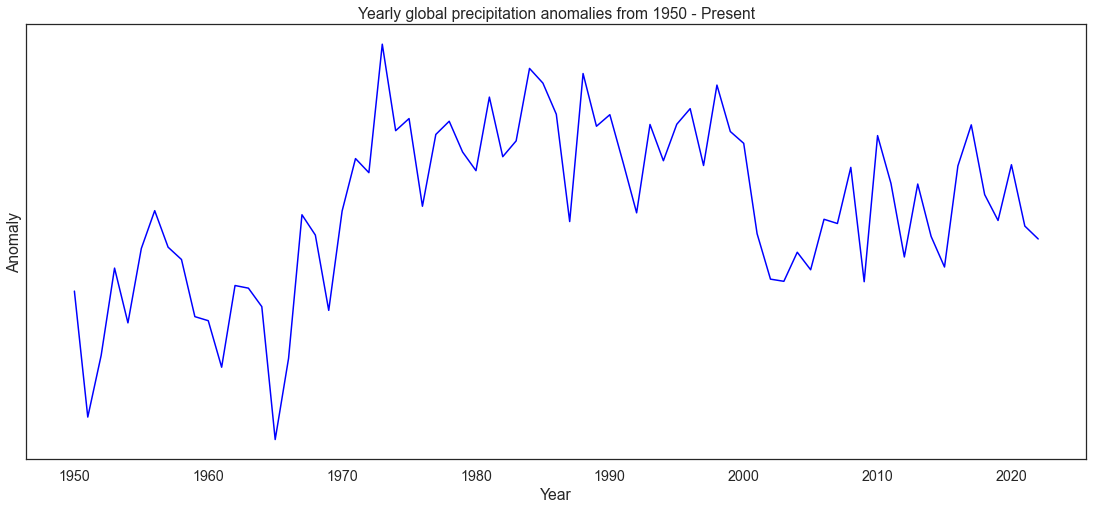

In [40]:
f, ax = plt.subplots(figsize=(19, 8))
plt.yticks(np.arange(min(anm), max(anm)+0.2, 0.5))
           
yearly_anomalies.plot(hue='lat',ax=ax,color="blue",label ='Mean temperature')
plt.xlabel('Year')
plt.ylabel('Anomaly')
plt.title('Yearly global precipitation anomalies from 1950 - Present')
plt.savefig('YearlyGlobalPrecpAnomalies.png')

In [42]:
yearly_anomalies.to_pandas().to_csv("yearlyanomalies.csv")